In [1]:
import numpy as np
import pandas as pd
import re
import missingno as msno

In [2]:
adventure_csv = pd.read_csv("../IMDB/adventure_series.csv")

In [3]:
adventure_csv.head()

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue
0,The Little Mermaid,tt5971474,I) (2023,"Adventure, Family, Fantasy","Director:, Rob Marshall, | , Stars:, Halle...",A young mermaid makes a deal with a sea witch ...,7.2,135 min,PG,69638,NaN
1,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN
2,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN
3,Fast X,tt5433140,2023,"Action, Adventure, Crime","Director:, Louis Leterrier, | , Stars:, Vi...",Dom Toretto and his family are targeted by the...,6.3,141 min,PG-13,39326,NaN
4,Guardians of the Galaxy Vol. 3,tt6791350,2023,"Action, Adventure, Comedy","Director:, James Gunn, | , Stars:, Chris P...","Still reeling from the loss of Gamora, Peter Q...",8.2,150 min,PG-13,160447,NaN


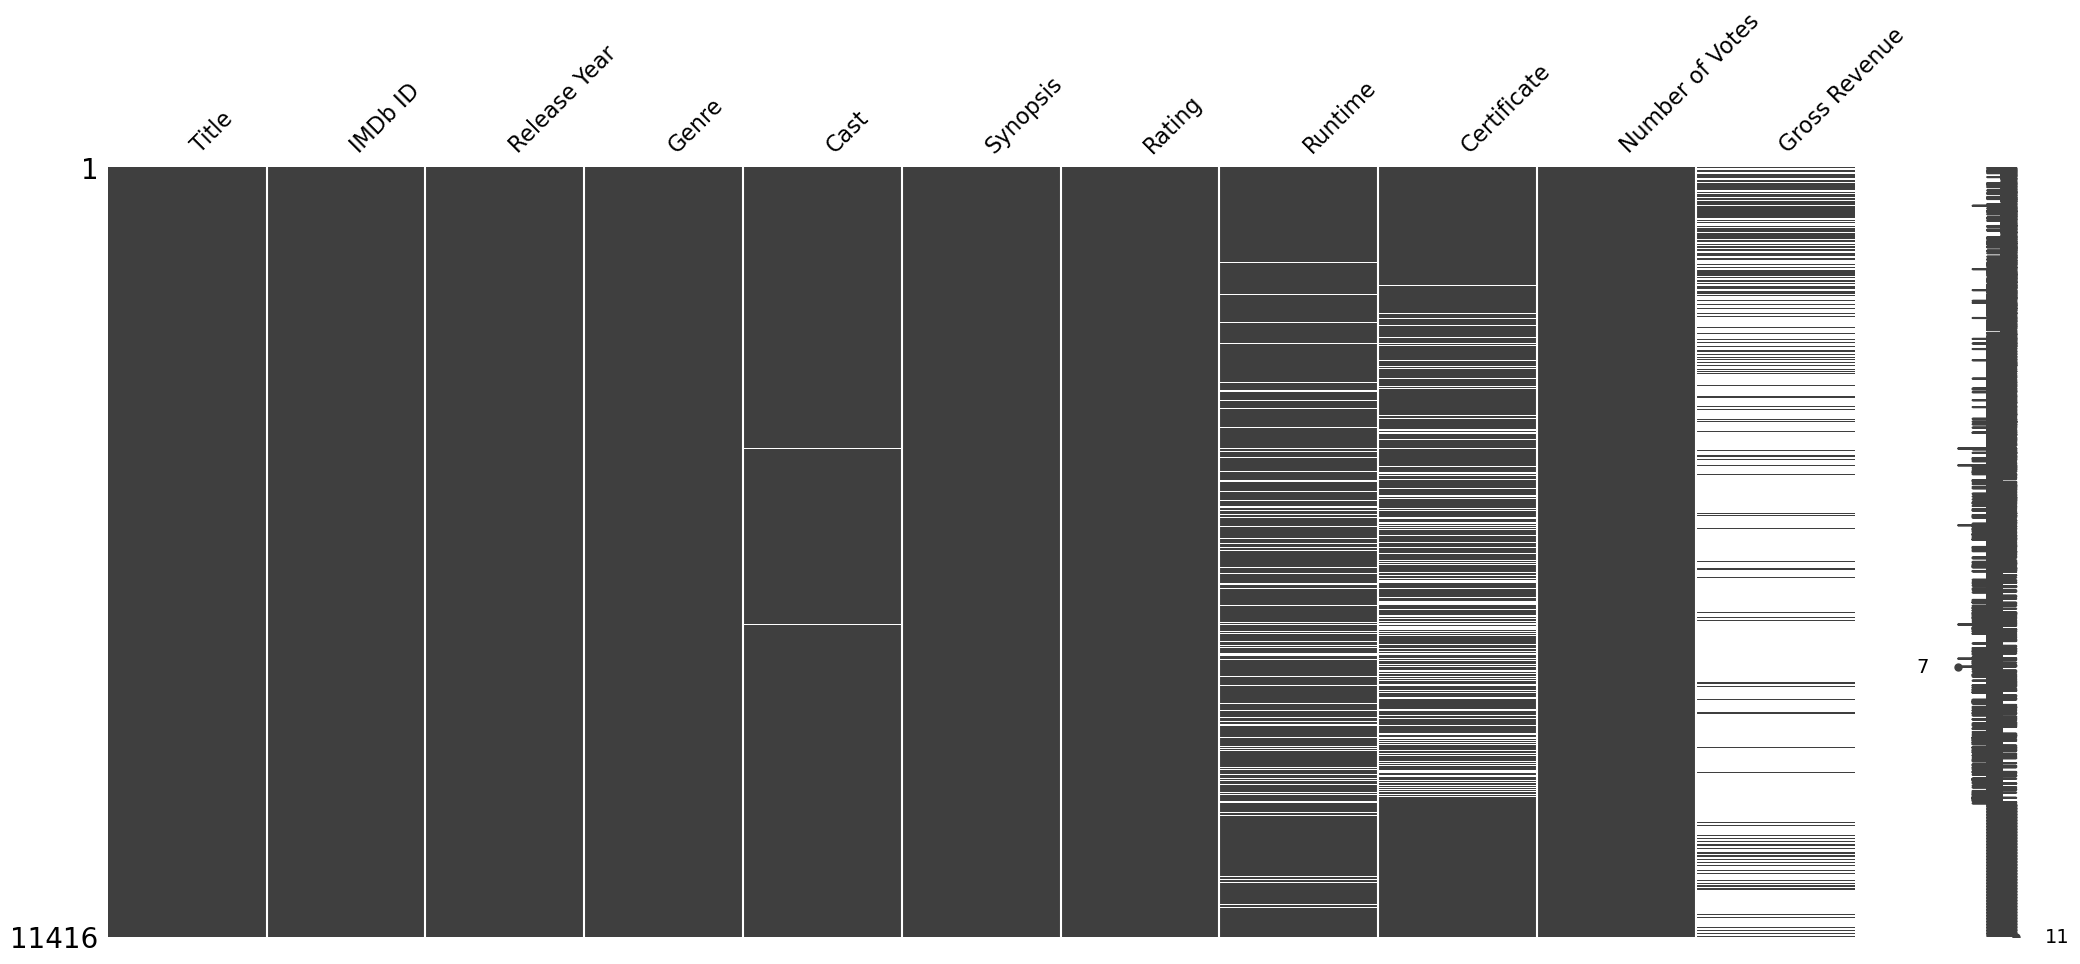

In [4]:
msno.matrix(adventure_csv);

In [5]:
clean_data_adv_csv = adventure_csv.drop(['Certificate','Gross Revenue'], axis=1)

In [6]:
clean_data_adv_csv.head()

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Number of Votes
0,The Little Mermaid,tt5971474,I) (2023,"Adventure, Family, Fantasy","Director:, Rob Marshall, | , Stars:, Halle...",A young mermaid makes a deal with a sea witch ...,7.2,135 min,69638
1,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,71960
2,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,15422
3,Fast X,tt5433140,2023,"Action, Adventure, Crime","Director:, Louis Leterrier, | , Stars:, Vi...",Dom Toretto and his family are targeted by the...,6.3,141 min,39326
4,Guardians of the Galaxy Vol. 3,tt6791350,2023,"Action, Adventure, Comedy","Director:, James Gunn, | , Stars:, Chris P...","Still reeling from the loss of Gamora, Peter Q...",8.2,150 min,160447


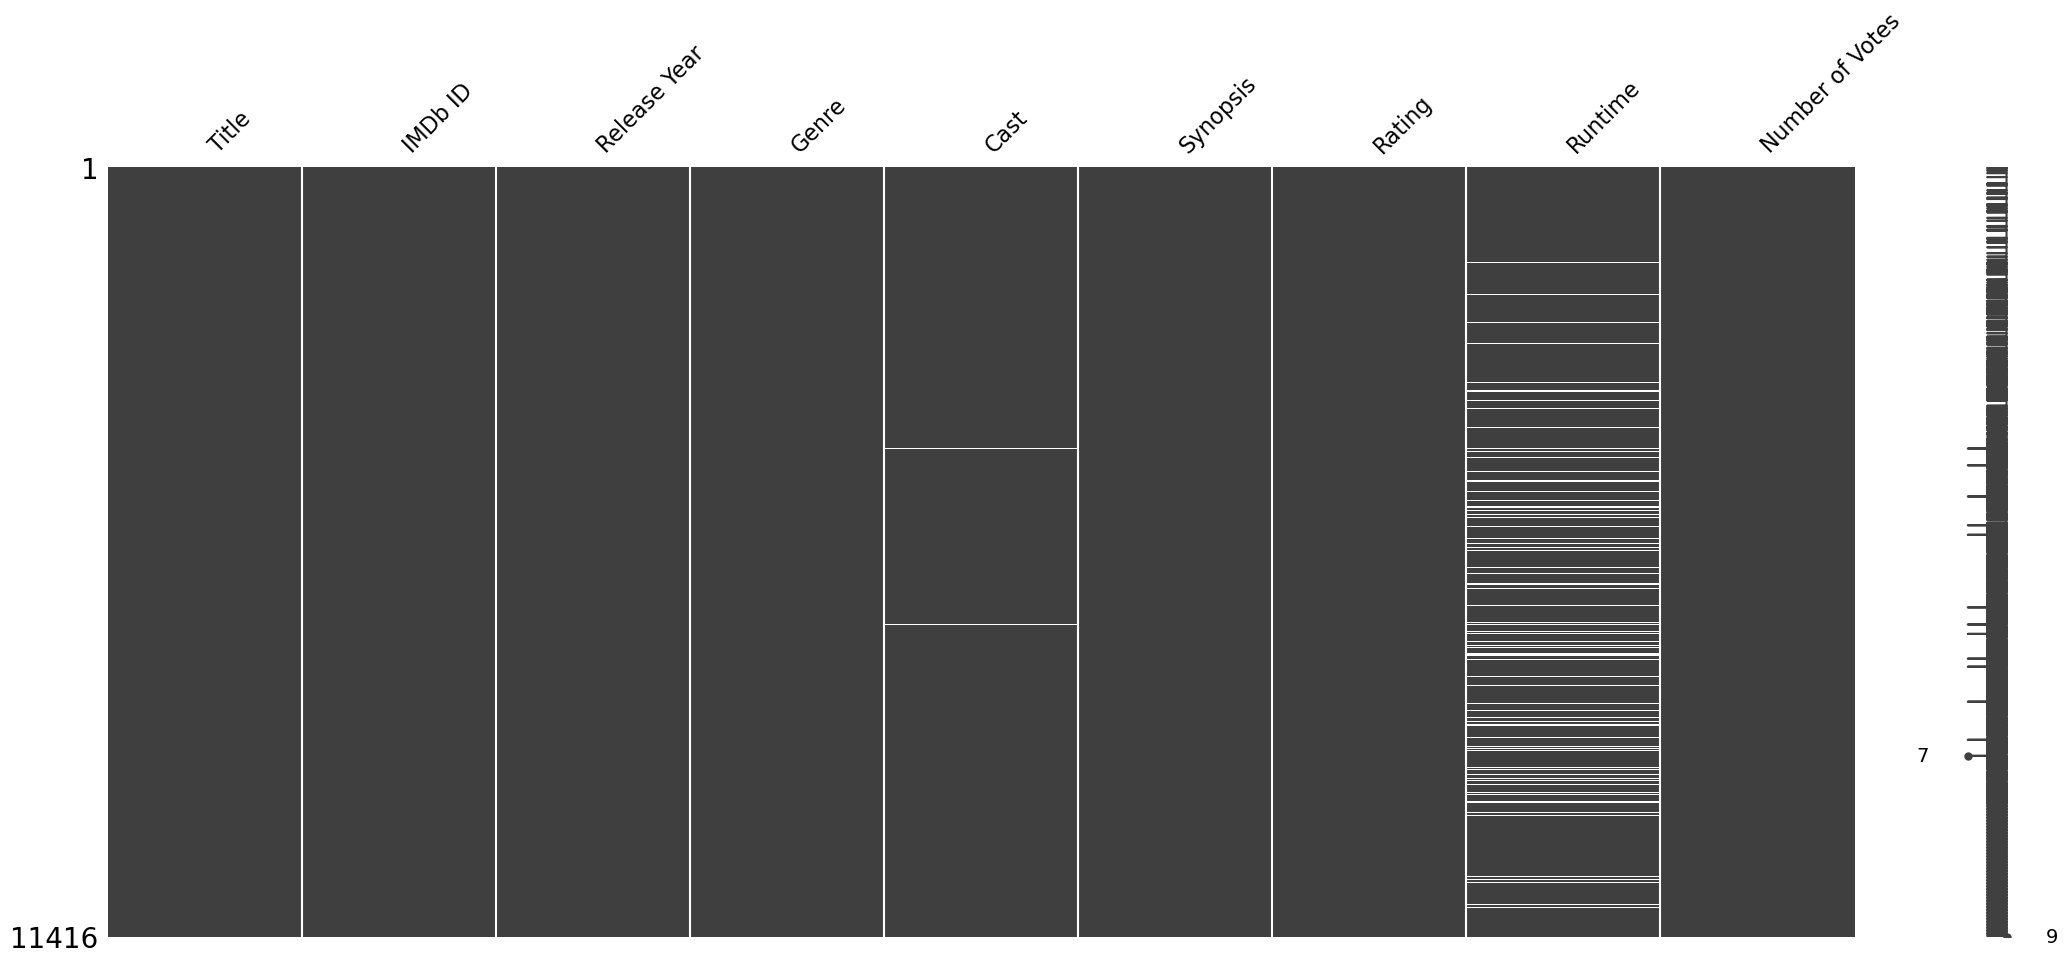

In [7]:
msno.matrix(clean_data_adv_csv);

In [8]:
# col_data = clean_data_adv_csv["Runtime"]

# just_time = re.split('\s', col_data)

# print(just_time)
# clean_data_adv_csv["Runtime"] = just_time
#------------------------------------------------------------------------------------------
# clean_data_adv_csv["Runtime"] = clean_data_adv_csv["Runtime"].fillna('3')
# clean_data_adv_csv["Runtime"]



In [9]:
col_only = clean_data_adv_csv["Runtime"]
runtime_num = col_only.str.replace(" min", "")

In [10]:
runtime_num

0        135
1        140
2        NaN
3        141
4        150
        ... 
11411    155
11412     44
11413     23
11414    148
11415    132
Name: Runtime, Length: 11416, dtype: object

In [11]:
clean_data_adv_csv["Runtime"]

0        135 min
1        140 min
2            NaN
3        141 min
4        150 min
          ...   
11411    155 min
11412     44 min
11413     23 min
11414    148 min
11415    132 min
Name: Runtime, Length: 11416, dtype: object

In [12]:
clean_data_adv_csv["Runtime"] = runtime_num

In [13]:
clean_data_adv_csv["Runtime"]

0        135
1        140
2        NaN
3        141
4        150
        ... 
11411    155
11412     44
11413     23
11414    148
11415    132
Name: Runtime, Length: 11416, dtype: object

In [14]:
clean_data_adv_csv["Runtime"] = clean_data_adv_csv["Runtime"].str.replace(",", "", regex=False)
clean_data_adv_csv["Runtime"]

0        135
1        140
2        NaN
3        141
4        150
        ... 
11411    155
11412     44
11413     23
11414    148
11415    132
Name: Runtime, Length: 11416, dtype: object

In [15]:
nan_data = clean_data_adv_csv["Runtime"]
fixed_data = pd.to_numeric(nan_data)
mean_data = fixed_data.mean()
clean_data_adv_csv["Runtime"] = fixed_data.fillna(mean_data)
clean_data_adv_csv["Runtime"] = clean_data_adv_csv["Runtime"].astype(int)
clean_data_adv_csv["Runtime"]


# df["Age"] = pd.to_numeric(df["Age"])

0        135
1        140
2         85
3        141
4        150
        ... 
11411    155
11412     44
11413     23
11414    148
11415    132
Name: Runtime, Length: 11416, dtype: int32

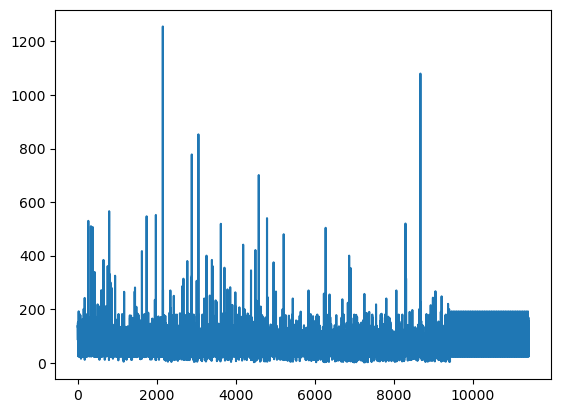

In [16]:
clean_data_adv_csv["Runtime"].plot();

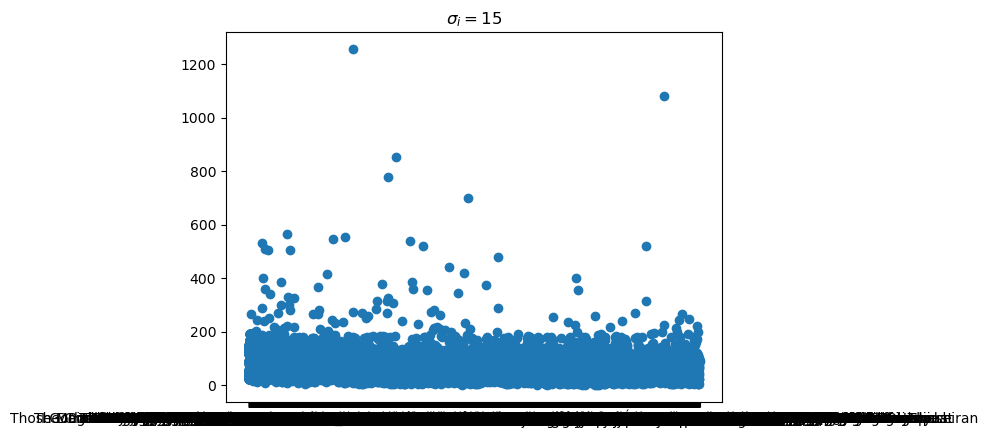

In [42]:
import matplotlib.pyplot as plt


y = clean_data_adv_csv["Runtime"]
x = clean_data_adv_csv["Title"]

fig, ax = plt.subplots()

ax.scatter(x, y)

ax.set_title(r'$\sigma_i=15$')

plt.show()